## Course Code: ***CSE3502***
## Course: ***Information Security Management***
# Title: ***Detection of Various Types of DDoS Attacks Using Machine Learning***
## Name: ***Deepesh Suranjandass***
## REGNO: ***19BCE2210***
## Name: ***Aaron Niju John***
## REGNO: ***19BCE0616***
## Faculty: ***Dr. Anil Kumar K***
## Slot: ***F1***

In [1]:
#ICMP ATTACK ANALYSIS ISM PROJECT
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]

In [3]:
len(colnames)

42

In [4]:
df = pd.read_csv("C:/Users/aaron/Downloads/ISM/dataset/corrected.csv",header=None,names=colnames)

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [6]:
df.shape

(311029, 42)

In [7]:
#below csv file is a revised one 
df.to_csv("revised_kddcup_dataset.csv")

In [8]:
#extracting the icmp packets from our dataset
icmp_df = df[df.loc[:,"protocol_type"] == "icmp"]

In [9]:
icmp_df.isnull().sum()
#none of the values in dataset are null

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [10]:
icmp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
82,0,icmp,eco_i,SF,30,0,0,0,0,0,...,3,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.
156,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,75,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
406,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,98,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
629,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,120,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
767,0,icmp,eco_i,SF,30,0,0,0,0,0,...,2,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
#I will be extracting all the important features as a "priority" for preprocessing
features = ["duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]
target = "result"

In [12]:
X = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]

In [13]:
classes = np.unique(y)
print(classes)

['ipsweep.' 'multihop.' 'normal.' 'pod.' 'saint.' 'satan.' 'smurf.'
 'snmpguess.']


In [14]:
icmp_df['result'].unique()

array(['normal.', 'smurf.', 'ipsweep.', 'saint.', 'pod.', 'multihop.',
       'satan.', 'snmpguess.'], dtype=object)

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
icmp_df['result']= label_encoder.fit_transform(icmp_df['result'])
icmp_df['result'].unique()

C:\Users\aaron\AppData\Local\Temp/ipykernel_12384/3927206278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icmp_df['result']= label_encoder.fit_transform(icmp_df['result'])


array([2, 6, 0, 4, 3, 1, 5, 7])

In [16]:
#turning the service attribute to categorical values
icmp_df=icmp_df.replace("eco_i",-0.1)
icmp_df=icmp_df.replace("ecr_i",0.0)
icmp_df=icmp_df.replace("tim_i",0.1)
icmp_df=icmp_df.replace("urp_i",0.2)

In [17]:
icmp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
82,0,icmp,-0.1,SF,30,0,0,0,0,0,...,3,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,2
156,0,icmp,0.0,SF,30,0,0,0,0,0,...,75,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,2
406,0,icmp,0.0,SF,30,0,0,0,0,0,...,98,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,2
629,0,icmp,0.0,SF,30,0,0,0,0,0,...,120,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,2
767,0,icmp,-0.1,SF,30,0,0,0,0,0,...,2,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,2


In [18]:
y = icmp_df.loc[:,target]

[]

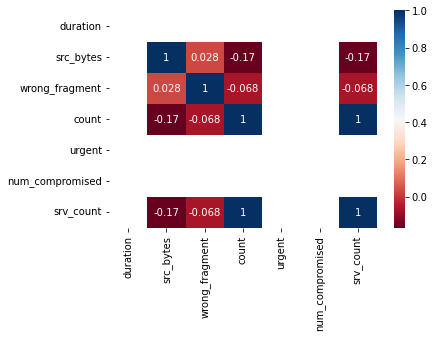

In [19]:
#I selected certain features but I will have to find some covariance between them so I will plot a covariance heatmap
sns.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()
#the data as seen is highly uncorrelated as most of it is one valued such as the duration one.

In [20]:
from sklearn.ensemble import RandomForestClassifier
rs = RandomForestClassifier()
rs.fit(X,y)
print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))

src_bytes          0.473910
count              0.255850
srv_count          0.226801
wrong_fragment     0.043439
duration           0.000000
urgent             0.000000
num_compromised    0.000000
dtype: float64


In [21]:
X = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]
X.head(5)

,duration,src_bytes,wrong_fragment,count,urgent,num_compromised,srv_count
82,0,30,0,2,0,0,2
156,0,30,0,2,0,0,2
406,0,30,0,2,0,0,2
629,0,30,0,1,0,0,1
767,0,30,0,3,0,0,1


In [22]:
print(list(X.loc[629,:])) #7 input features

[0, 30, 0, 1, 0, 0, 1]


In [23]:
print(y.loc[629])

2


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### ML Models: 

### 1.***Logistic Regression***
### 2.***K Nearest Neighbours***
### 3.***MLP Classifier***
### 4.***Decision Tree***
### 5.***SVM***
### 6.***Naive Bayes***
### 7.***RandomForest Classification***
### 8.***Adaboost***
### 9.***Gradient Boosting***
### 10.***XGBoost***

In [27]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier(),SVC(),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
classifiers = ["LR", "KNN","MLP","DT","SVM","NB","RF","AdaBoost","GB","XGB"]
scores = []

In [28]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Accuracy of the model is:  99.56557757976198
Confusion Matrix:
 [[    8     0     0    11    82]
 [    0    13     0     0    93]
 [    0    23     0     0     0]
 [    2     0     0    29     1]
 [    0     3     0     0 49226]]
Report:
               precision    recall  f1-score   support

           0       0.80      0.08      0.14       101
           2       0.33      0.12      0.18       106
           3       0.00      0.00      0.00        23
           4       0.72      0.91      0.81        32
           6       1.00      1.00      1.00     49229

    accuracy                           1.00     49491
   macro avg       0.57      0.42      0.43     49491
weighted avg       0.99      1.00      0.99     49491


==============***===============
Accuracy of the model is:  99.98989715301772
Confusion Matrix:
 [[  100     0     0     0     1]
 [    0   105     1     0     0]
 [    0     0    23     0     0]
 [    2     1     0    29     0]
 [    0     0     0     0 49229]]
Report:


C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metr

Confusion Matrix:
 [[   17    83     0     0     1     0]
 [    9    74     5     0     0    18]
 [    0     1    22     0     0     0]
 [    0     0     0    31     1     0]
 [    0     2     0     0 49227     0]
 [    0     0     0     0     0     0]]
Report:
               precision    recall  f1-score   support

           0       0.65      0.17      0.27       101
           2       0.46      0.70      0.56       106
           3       0.81      0.96      0.88        23
           4       1.00      0.97      0.98        32
           6       1.00      1.00      1.00     49229
           7       0.00      0.00      0.00         0

    accuracy                           1.00     49491
   macro avg       0.66      0.63      0.61     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============
Accuracy of the model is:  99.99595886120709
Confusion Matrix:
 [[  100     0     0     0     1]
 [    0   106     0     0     0]
 [    0     0    23     0     

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is:  99.56961871855489
Confusion Matrix:
 [[   17     0     0     0     1     1    82]
 [    0     2     0     0     0    12    92]
 [    0     0     1     0     0    22     0]
 [    0     0     0    31     0     0     1]
 [    0     0     0     0     0     0     0]
 [    0     2     0     0     0 49227     0]
 [    0     0     0     0     0     0     0]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.17      0.29       101
           2       0.50      0.02      0.04       106
           3       1.00      0.04      0.08        23
           4       1.00      0.97      0.98        32
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00     49229
           7       0.00      0.00      0.00         0

    accuracy                           1.00     49491
   macro avg       0.64      0.31      0.34     49491
weighted avg       1.00      1.00      1.00     49491


=============

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning

[21:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the model is:  99.99393829181064
Confusion Matrix:
 [[  100     0     0     0     1     0]
 [    0   105     0     0     0     1]
 [    0     0    23     0     0     0]
 [    0     0     0    31     1     0]
 [    0     0     0     0 49229     0]
 [    0     0     0     0     0     0]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           2       1.00      0.99      1.00       106
           3       1.00      1.00      1.00        23
           4       1.00      0.97      0.98        32
           6       1.00      1.00      1.00     49229
           7       0.00      0.00      0.00         0

 

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ***An array of all accuracies of the models***

In [29]:
scores=scores[:10]
scores

[99.56557757976198,
 99.98989715301772,
 99.87674526681619,
 99.99595886120709,
 99.71712028449618,
 99.75753167242529,
 99.99595886120709,
 99.94342405689923,
 99.56961871855489,
 99.99393829181064]

### ***Plotting of the accuracies of all models***

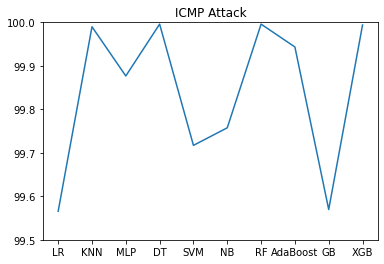

In [30]:
plt.plot(classifiers,scores)
plt.title("ICMP Attack")
plt.ylim(99.5,100)
plt.show()

### ***Sample Model Running Codes***

In [41]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  99.56557757976198
Confusion Matrix:
 [[    8     0     0    11    82]
 [    0    13     0     0    93]
 [    0    23     0     0     0]
 [    2     0     0    29     1]
 [    0     3     0     0 49226]]
Report:
               precision    recall  f1-score   support

           0       0.80      0.08      0.14       101
           2       0.33      0.12      0.18       106
           3       0.00      0.00      0.00        23
           4       0.72      0.91      0.81        32
           6       1.00      1.00      1.00     49229

    accuracy                           1.00     49491
   macro avg       0.57      0.42      0.43     49491
weighted avg       0.99      1.00      0.99     49491


==============***===============


C:\Users\aaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [42]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)

model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  99.98989715301772
Confusion Matrix:
 [[  100     0     0     0     1]
 [    0   105     1     0     0]
 [    0     0    23     0     0]
 [    2     1     0    29     0]
 [    0     0     0     0 49229]]
Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       101
           2       0.99      0.99      0.99       106
           3       0.96      1.00      0.98        23
           4       1.00      0.91      0.95        32
           6       1.00      1.00      1.00     49229

    accuracy                           1.00     49491
   macro avg       0.99      0.98      0.98     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============


In [43]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(alpha=0.005)

model_mlp.fit(X_train,y_train)
y_pred = model_mlp.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  99.92928007112404
Confusion Matrix:
 [[  100     0     0     0     1]
 [    1    97     0     0     8]
 [    0    22     0     0     1]
 [    1     0     0    30     1]
 [    0     0     0     0 49229]]
Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       101
           2       0.82      0.92      0.86       106
           3       0.00      0.00      0.00        23
           4       1.00      0.94      0.97        32
           6       1.00      1.00      1.00     49229

    accuracy                           1.00     49491
   macro avg       0.76      0.77      0.76     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============


C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  99.99595886120709
Confusion Matrix:
 [[  100     0     0     0     1]
 [    0   106     0     0     0]
 [    0     0    23     0     0]
 [    0     1     0    31     0]
 [    0     0     0     0 49229]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           2       0.99      1.00      1.00       106
           3       1.00      1.00      1.00        23
           4       1.00      0.97      0.98        32
           6       1.00      1.00      1.00     49229

    accuracy                           1.00     49491
   macro avg       1.00      0.99      0.99     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============


In [31]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


Accuracy of  model is:  99.71712028449618
Confusion Matrix:
 [[    0   100     0     0     1]
 [    0   100     6     0     0]
 [    0     0    22     0     1]
 [    0    32     0     0     0]
 [    0     0     0     0 49229]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           2       0.43      0.94      0.59       106
           3       0.79      0.96      0.86        23
           4       0.00      0.00      0.00        32
           6       1.00      1.00      1.00     49229

    accuracy                           1.00     49491
   macro avg       0.44      0.58      0.49     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============


C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
np.unique(y_pred)

array([2, 3, 6])

In [33]:
from sklearn.naive_bayes import GaussianNB

model_bayes = GaussianNB()

model_bayes.fit(X_train,y_train)
y_pred = model_bayes.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


Accuracy of  model is:  99.75753167242529
Confusion Matrix:
 [[   17    83     0     0     1     0]
 [    9    74     5     0     0    18]
 [    0     1    22     0     0     0]
 [    0     0     0    31     1     0]
 [    0     2     0     0 49227     0]
 [    0     0     0     0     0     0]]
Report:
               precision    recall  f1-score   support

           0       0.65      0.17      0.27       101
           2       0.46      0.70      0.56       106
           3       0.81      0.96      0.88        23
           4       1.00      0.97      0.98        32
           6       1.00      1.00      1.00     49229
           7       0.00      0.00      0.00         0

    accuracy                           1.00     49491
   macro avg       0.66      0.63      0.61     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============


C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
np.unique(y_pred)

array([0, 2, 3, 4, 6, 7])

In [35]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


Accuracy of  model is:  99.99595886120709
Confusion Matrix:
 [[  100     0     0     0     1]
 [    0   106     0     0     0]
 [    0     0    23     0     0]
 [    0     1     0    31     0]
 [    0     0     0     0 49229]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           2       0.99      1.00      1.00       106
           3       1.00      1.00      1.00        23
           4       1.00      0.97      0.98        32
           6       1.00      1.00      1.00     49229

    accuracy                           1.00     49491
   macro avg       1.00      0.99      0.99     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============


In [36]:
from sklearn.ensemble import AdaBoostClassifier

model_adc = AdaBoostClassifier()

print()
model_adc.fit(X_train,y_train)
y_pred = model_adc.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")



Accuracy of  model is:  99.94342405689923
Confusion Matrix:
 [[  100     0     0     0     1]
 [    0   105     0     0     1]
 [    0    23     0     0     0]
 [    0     0     0    32     0]
 [    0     3     0     0 49226]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           2       0.80      0.99      0.89       106
           3       0.00      0.00      0.00        23
           4       1.00      1.00      1.00        32
           6       1.00      1.00      1.00     49229

    accuracy                           1.00     49491
   macro avg       0.76      0.80      0.78     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============


C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()

print()
model_gb.fit(X_train,y_train)
y_pred = model_gb.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")



Accuracy of  model is:  99.56557757976198
Confusion Matrix:
 [[   15     0     0     0     1     3    82]
 [    0     2     0     0     0    12    92]
 [    0     0     1     0     0    22     0]
 [    0     0     0    31     0     0     1]
 [    0     0     0     0     0     0     0]
 [    0     2     0     0     0 49227     0]
 [    0     0     0     0     0     0     0]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.15      0.26       101
           2       0.50      0.02      0.04       106
           3       1.00      0.04      0.08        23
           4       1.00      0.97      0.98        32
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00     49229
           7       0.00      0.00      0.00         0

    accuracy                           1.00     49491
   macro avg       0.64      0.31      0.34     49491
weighted avg       1.00      1.00      1.00     49491


==============*

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


C:\Users\aaron\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:43:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of  model is:  99.99393829181064
Confusion Matrix:
 [[  100     0     0     0     1     0]
 [    0   105     0     0     0     1]
 [    0     0    23     0     0     0]
 [    0     0     0    31     1     0]
 [    0     0     0     0 49229     0]
 [    0     0     0     0     0     0]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           2       1.00      0.99      1.00       106
           3       1.00      1.00      1.00        23
           4       1.00      0.97      0.98        32
           6       1.00      1.00      1.00     49229
           7       0.00      0.00      0.00         0

    

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
